In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar


In [2]:
#task 1
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]


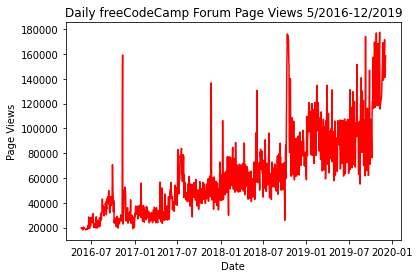

In [3]:
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.rcParams["figure.figsize"] = (18,9)
plt.plot(df['date'],df['value'], color = 'red')
fig = plt.gcf()
fig.savefig("lineplot.png")

In [4]:
#task2
df.set_index(['date'],inplace = True)
df_bar = df.groupby([df.index.month,df.index.year]).mean()
# Draw bar plot
grouped = df_bar.unstack().fillna(0).stack()

In [5]:
years = grouped.index.get_level_values(1).tolist()
years = list(set(years))
years

[2016, 2017, 2018, 2019]

In [6]:
barWidth = 0.05
br0 = [0,1,2,3]
bar_list = {}
for i in range(12):
    if i == 0:
        bar_list[i] = br0
    else:
        bar_list[i] = [x+barWidth for x in bar_list[i-1]]

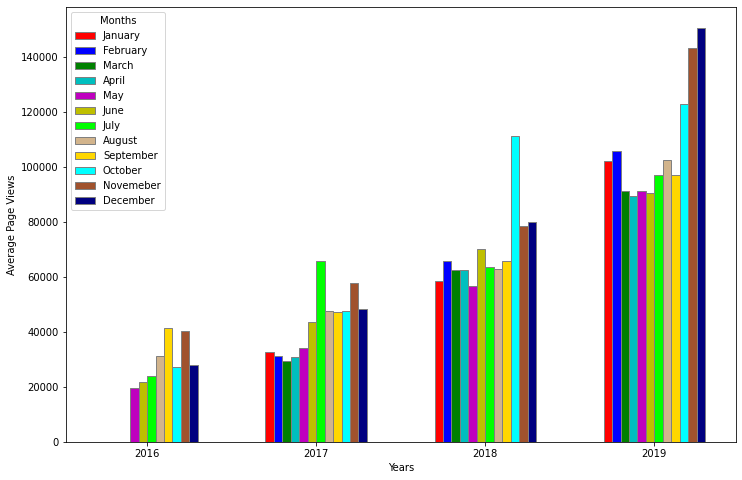

<Figure size 1296x648 with 0 Axes>

In [7]:
fig = plt.subplots(figsize =(12, 8))

plt.bar(bar_list[0], grouped.loc[1,'value'].values, color ='r', width = 0.05,
        edgecolor ='grey', label ='January')
plt.bar(bar_list[1], grouped.loc[2,'value'].values, color ='b', width = 0.05,
        edgecolor ='grey', label ='February')
plt.bar(bar_list[2], grouped.loc[3,'value'].values, color ='g', width = 0.05,
        edgecolor ='grey', label ='March')
plt.bar(bar_list[3], grouped.loc[4,'value'].values, color ='c', width = 0.05,
        edgecolor ='grey', label ='April')
plt.bar(bar_list[4], grouped.loc[5,'value'].values, color ='m', width = 0.05,
        edgecolor ='grey', label ='May')
plt.bar(bar_list[5], grouped.loc[6,'value'].values, color ='y', width = 0.05,
        edgecolor ='grey', label ='June')
plt.bar(bar_list[6], grouped.loc[7,'value'].values, color ='lime', width = 0.05,
        edgecolor ='grey', label ='July')
plt.bar(bar_list[7], grouped.loc[8,'value'].values, color ='tan', width = 0.05,
        edgecolor ='grey', label ='August')
plt.bar(bar_list[8], grouped.loc[9,'value'].values, color ='gold', width = 0.05,
        edgecolor ='grey', label ='September')
plt.bar(bar_list[9], grouped.loc[10,'value'].values, color ='aqua', width = 0.05,
        edgecolor ='grey', label ='October')
plt.bar(bar_list[10], grouped.loc[11,'value'].values, color ='sienna', width = 0.05,
        edgecolor ='grey', label ='Novemeber')
plt.bar(bar_list[11], grouped.loc[12,'value'].values, color ='navy', width = 0.05,
        edgecolor ='grey', label ='December')

plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.xticks([r + (barWidth*5.5) for r in range(len(br0))],
        years)
plt.legend(title = "Months")

plt.show()
fig = plt.gcf()
fig.savefig('bar_plot.png')


In [8]:
#task 3
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

df_box = df.copy()
df_box.reset_index(inplace=True, drop = True)
df_box['Year'] = [d.year for d in df_box.date]
df_box['Month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,Year,Month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


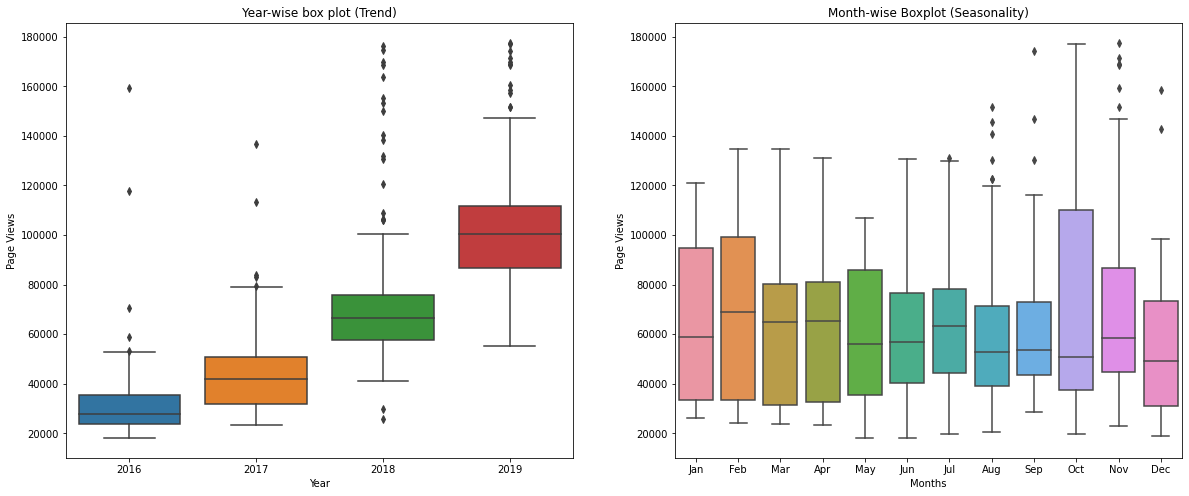

<Figure size 1296x648 with 0 Axes>

In [9]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20, 8)
sns.boxplot(x = 'Year', y = 'value',ax = axes[0], data = df_box).set(title="Year-wise box plot (Trend)", xlabel='Year', ylabel='Page Views')
sns.boxplot(x = 'Month', y = 'value', order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
            ax = axes[1], data = df_box).set(title='Month-wise Boxplot (Seasonality)', xlabel='Months', ylabel='Page Views')
plt.show()
fig = plt.gcf()
fig.savefig('box_plot.png')
